# Regresión lineal: calidad de los vinos

## Fits

En esta sección podemos encontrar los entrenamientos

In [152]:
import numpy as np

from sklearn.model_selection import train_test_split

def train(wine_pd):
    wine = wine_pd.copy()

    y = wine["quality"].copy()
    x = wine[["alcohol", "volatile acidity","sulphates",'citric acid']]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

    print(f'({len(x_train)+len(y_train)},{(len(x_test)+len(y_test))})')

    return x_train, y_train,x_test,y_test



## Plots

Recoge las definiciones para hacer mapas de calor, boxplots y mapas de calor

In [153]:
import matplotlib.pyplot as plt
def boxplot_general(wine_pd,cadena):
    for tipo in wine_pd.columns:
        if tipo !=cadena:
            data_to_plot = [wine_pd[wine_pd[cadena] == i][tipo].values for i in sorted(wine_pd[cadena].unique())]
            plt.figure(figsize=(10, 6))
            plt.boxplot(data_to_plot, labels=sorted(wine_pd[cadena].unique()),notch=True,patch_artist=True,
                        showmeans=True,whiskerprops=dict(color='deeppink',linewidth=1),
                        medianprops=dict(color='deeppink'),
                        flierprops=dict(color='deeppink', markerfacecolor='pink', linestyle= "none", markeredgecolor="none", markersize=9),
                        boxprops=dict(edgecolor='deeppink',  facecolor='pink', linewidth=2),
                        capprops=dict(color='deeppink', linewidth=2)
                        )
            plt.xlabel(cadena)
            plt.ylabel(f'{tipo}')
            plt.title(f'Boxplot Quality/ {tipo}')
            plt.show()
def boxplot(wine_pd,y,x):
        data_to_plot = [wine_pd[wine_pd[x] == i][y].values for i in sorted(wine_pd[x].unique())]
        plt.figure(figsize=(10, 6))
        plt.boxplot(data_to_plot, labels=sorted(wine_pd[x].unique()),notch=True,patch_artist=True,
                    showmeans=True,whiskerprops=dict(color='deeppink',linewidth=1),
                    medianprops=dict(color='deeppink'),
                    flierprops=dict(color='deeppink', markerfacecolor='pink', linestyle= "none", markeredgecolor="none", markersize=9),
                    boxprops=dict(edgecolor='deeppink',  facecolor='pink', linewidth=2),
                    capprops=dict(color='deeppink', linewidth=2)
                    )
        plt.xlabel(x)
        plt.ylabel(f'{y}')
        plt.title(f'Boxplot Quality/ {y}')
        plt.show()
def mapa_calor(corr_matrix):
  fig, ax = plt.subplots(figsize=(15, 8))
  text_colors = ("black" , "white" )
  im = ax.imshow(corr_matrix, cmap= "Greens" ) # mapa de calor
  cbar = fig.colorbar(im, ax=ax, label= "Correlacion" ) # leyenda
  cbar.outline.set_visible(False)

  x = corr_matrix.columns
  y = corr_matrix.index
  # Mostrar las etiquetas. El color del texto cambia en función de su normalización
  for i in range(len(y)):
    for j in range(len(x)):
      value = corr_matrix.iloc[i, j]
      text_color = text_colors[int(im.norm(value) > 0.5)] # color etiqueta
      ax.text(j, i, f"{value:.2f}" , color=text_color, va= "center" , ha= "center" )



  # Formateo de los ejes
  ax.set_xticks(range(len(x)))
  ax.set_xticklabels(x, rotation=90)
  ax.set_yticks(range(len(y)))
  ax.set_yticklabels(y)
  ax.invert_yaxis()
  ax.spines["right"].set_visible(False) # ocultar borde derecho
  ax.spines["top"].set_visible(False) # ocultar borde superior
  fig.tight_layout()

### QUALITY WINE CSV

### Importación de bibliotecas

La primera parte del código importa las bibliotecas necesarias para trabajar con gráficos y datos en Python. Aquí está la descripción de cada una:

- `import matplotlib.pyplot as plt`: Importa la biblioteca `matplotlib.pyplot` bajo el alias `plt`. `matplotlib.pyplot` es una biblioteca para crear visualizaciones estáticas, como gráficos de líneas, barras, histogramas, etc.

- `import numpy as np`: Importa la biblioteca `numpy` bajo el alias `np`. `numpy` es una biblioteca para trabajar con matrices y operaciones matemáticas en Python. Es ampliamente utilizada para el cálculo numérico en Python.

- `import pandas as pd`: Importa la biblioteca `pandas` bajo el alias `pd`. `pandas` es una biblioteca para la manipulación y análisis de datos en Python. Proporciona estructuras de datos flexibles y eficientes para trabajar con datos tabulares, como DataFrames.

Estas importaciones nos permiten utilizar las funciones y clases proporcionadas por estas bibliotecas en nuestro código.


In [154]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Lectura de datos desde un archivo CSV

En esta parte del código, se está leyendo un archivo CSV llamado `'winequality-red.csv'` y almacenando los datos en un DataFrame de Pandas. Mostrará las 5 primeras filas


In [155]:
wine_pd= pd.read_csv('winequality-red.csv')
wine_pd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



Proporciona información detallada sobre el DataFrame `wine_pd`, incluyendo el número de filas, el nombre y tipo de cada columna, y el número de valores no nulos en cada columna. Esto puede ayudarte a comprender mejor la estructura y la calidad de los datos cargados desde el archivo CSV


In [156]:
wine_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Se utiliza la función `len()` para determinar la longitud del DataFrame `wine_pd`, es decir, el número total de filas en el DataFrame.

In [157]:
len(wine_pd)

1599

Utiliza el método `describe()` del DataFrame `wine_pd` para obtener estadísticas descriptivas sobre las columnas numéricas del DataFrame.


In [158]:
wine_pd.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Histogramas de las columnas del DataFrame

Se utiliza el método `hist()` del DataFrame `wine_pd` para generar histogramas de las columnas del DataFrame.

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

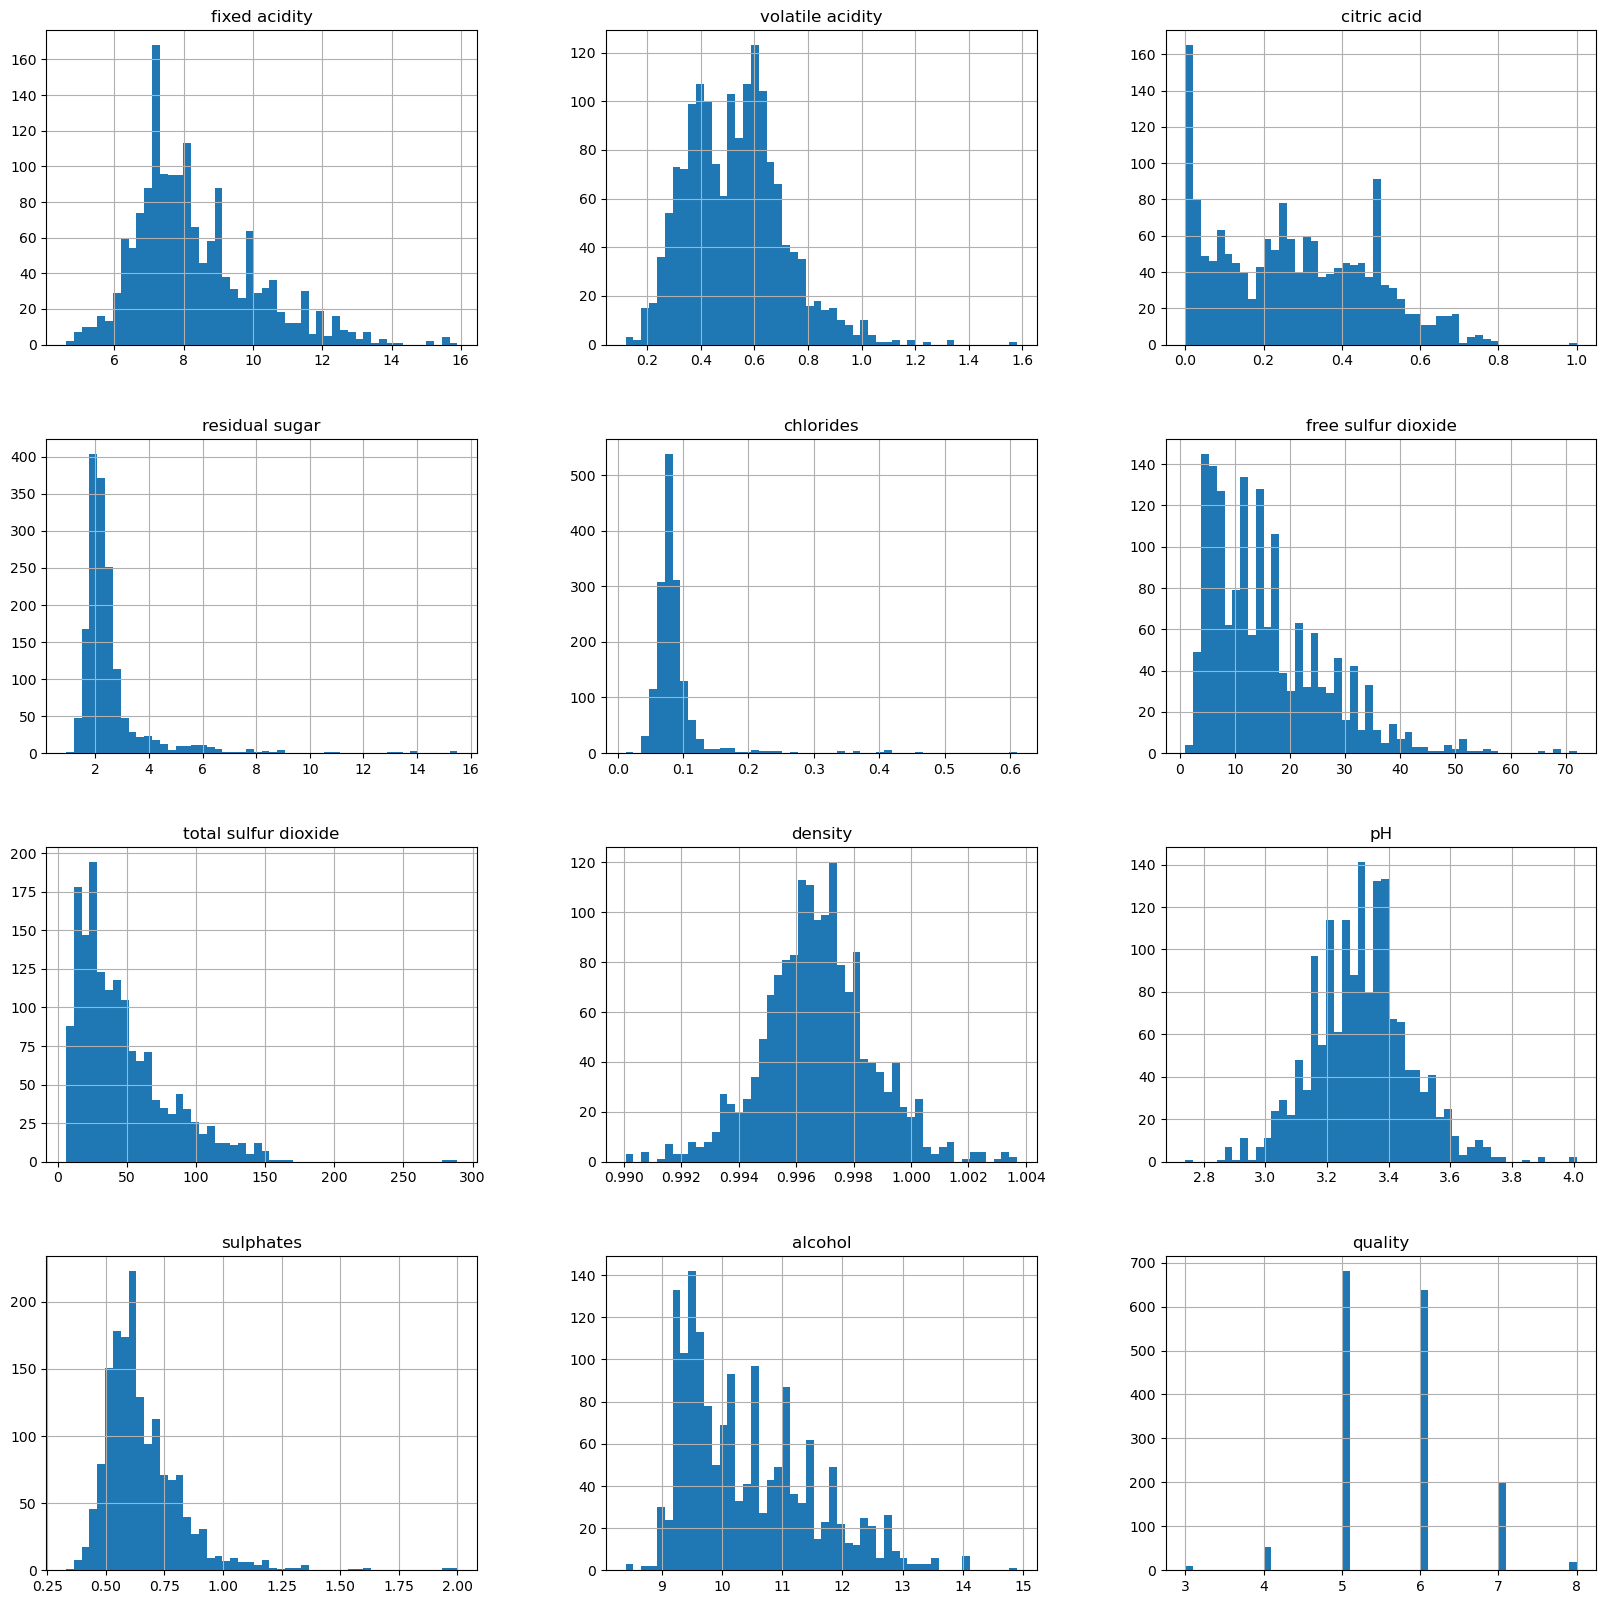

In [159]:
wine_pd.hist(bins=50, figsize=(20,20))

Se utiliza el método `plot()` del DataFrame `wine_pd` para generar un gráfico de dispersión (scatter plot) que muestra la relación entre dos variables, 'alcohol' en el eje x y 'volatile acidity' en el eje y. Los puntos en el gráfico se colorearán de acuerdo con la columna 'quality'.

<Axes: xlabel='alcohol', ylabel='volatile acidity'>

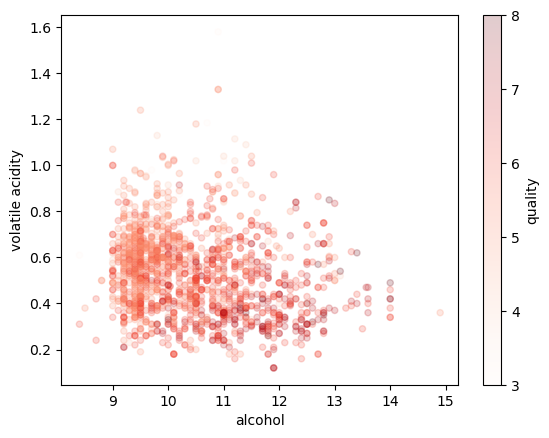

In [160]:
wine_pd.plot(kind='scatter', x= 'alcohol', y= 'volatile acidity', alpha=0.2, c='quality',cmap='Reds')

Se utiliza la función `scatter_matrix()` del módulo `pandas.plotting` para generar una matriz de gráficos de dispersión que muestra las relaciones entre múltiples variables del DataFrame `wine_pd`.

array([[<Axes: xlabel='quality', ylabel='quality'>,
        <Axes: xlabel='alcohol', ylabel='quality'>,
        <Axes: xlabel='density', ylabel='quality'>,
        <Axes: xlabel='fixed acidity', ylabel='quality'>,
        <Axes: xlabel='volatile acidity', ylabel='quality'>],
       [<Axes: xlabel='quality', ylabel='alcohol'>,
        <Axes: xlabel='alcohol', ylabel='alcohol'>,
        <Axes: xlabel='density', ylabel='alcohol'>,
        <Axes: xlabel='fixed acidity', ylabel='alcohol'>,
        <Axes: xlabel='volatile acidity', ylabel='alcohol'>],
       [<Axes: xlabel='quality', ylabel='density'>,
        <Axes: xlabel='alcohol', ylabel='density'>,
        <Axes: xlabel='density', ylabel='density'>,
        <Axes: xlabel='fixed acidity', ylabel='density'>,
        <Axes: xlabel='volatile acidity', ylabel='density'>],
       [<Axes: xlabel='quality', ylabel='fixed acidity'>,
        <Axes: xlabel='alcohol', ylabel='fixed acidity'>,
        <Axes: xlabel='density', ylabel='fixed acidity'>

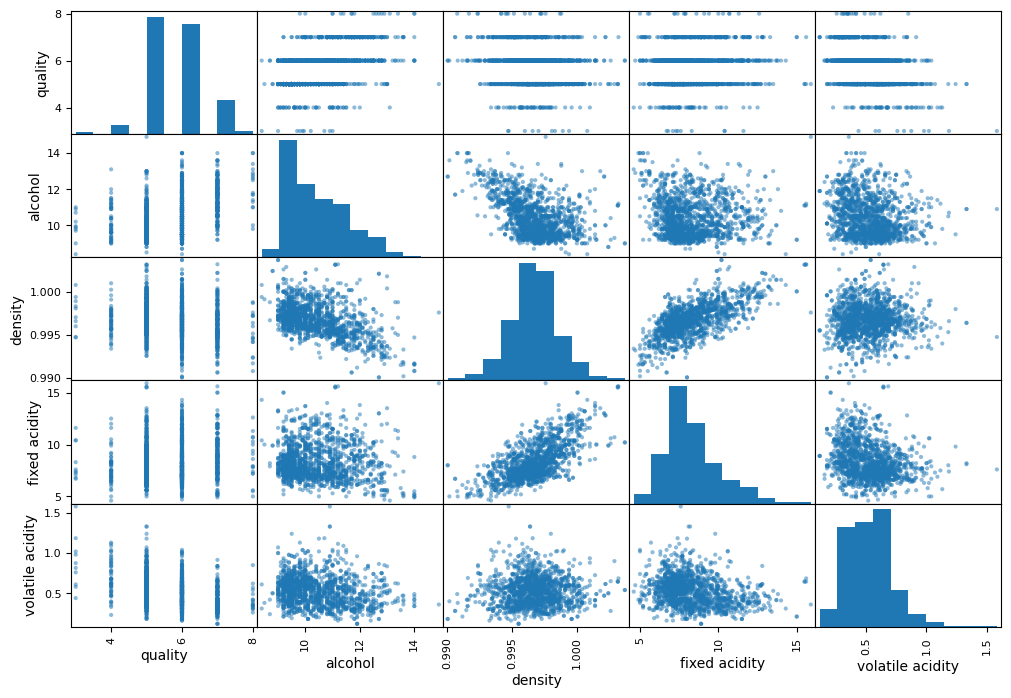

In [161]:
from pandas.plotting import scatter_matrix
atributes=['quality','alcohol','density','fixed acidity','volatile acidity']
scatter_matrix(wine_pd[atributes], figsize=(12,8))

Se utiliza el método `plot()` del DataFrame `wine_pd` para generar un gráfico de dispersión que muestra la relación entre la densidad y la acidez fija de los vinos.

<Axes: xlabel='density', ylabel='fixed acidity'>

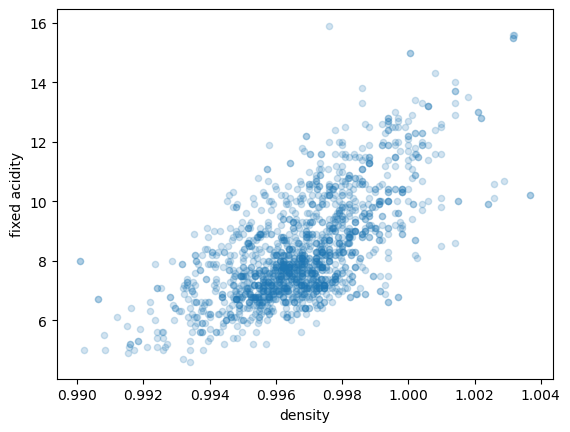

In [162]:
wine_pd.plot(kind='scatter', x='density',y= 'fixed acidity', alpha=0.2)

### Colums/quality

### Definición de la función `boxplot_general`

Se define la función `boxplot_general` que generará un boxplot de las columnas del DataFrame dado, utilizando una de las columnas en este caso quality como variable y en el boxplot.


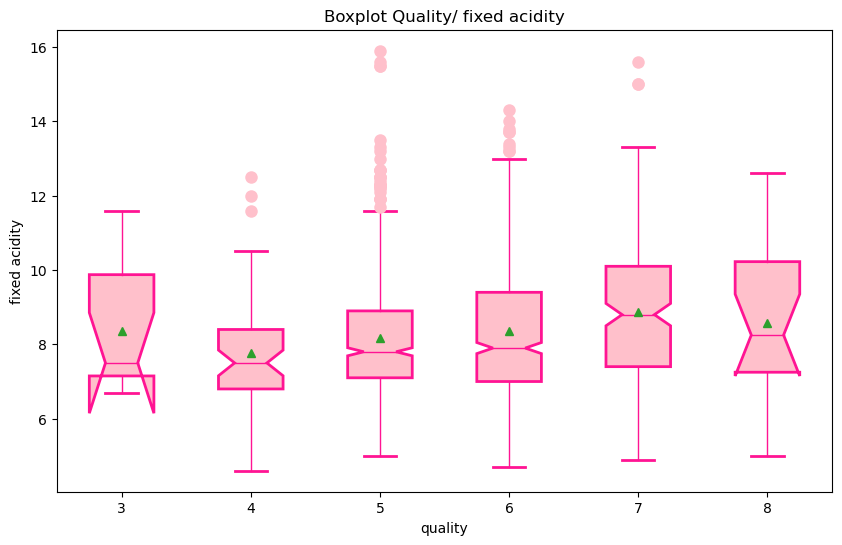

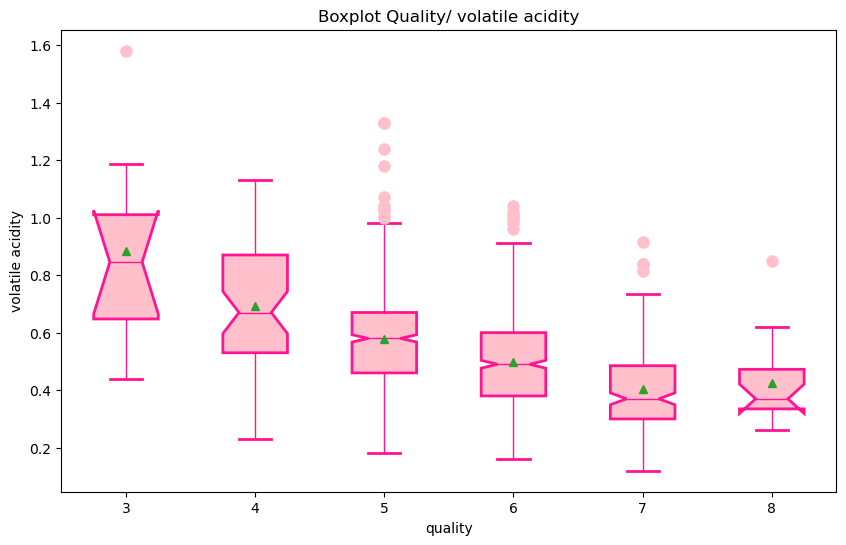

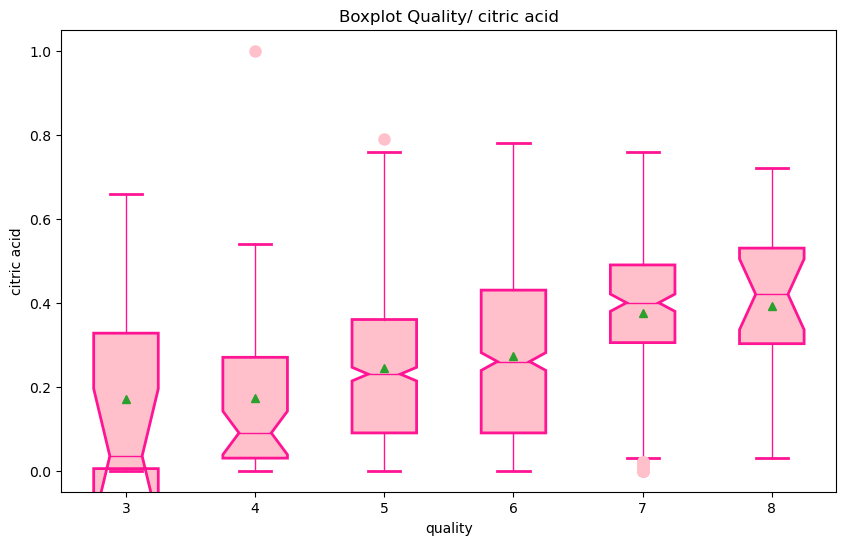

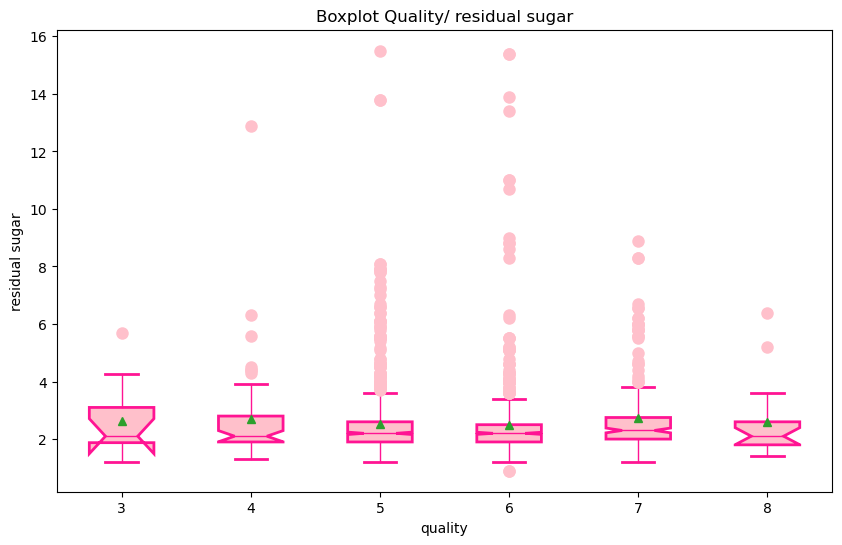

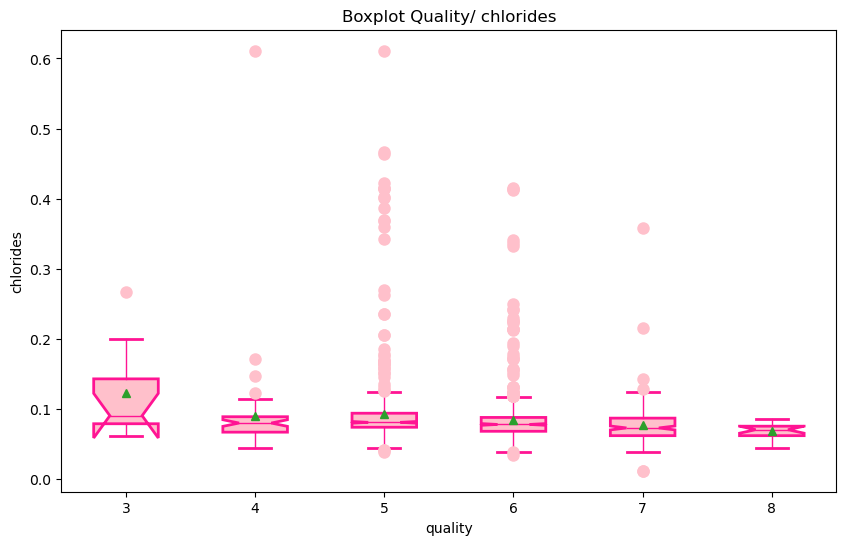

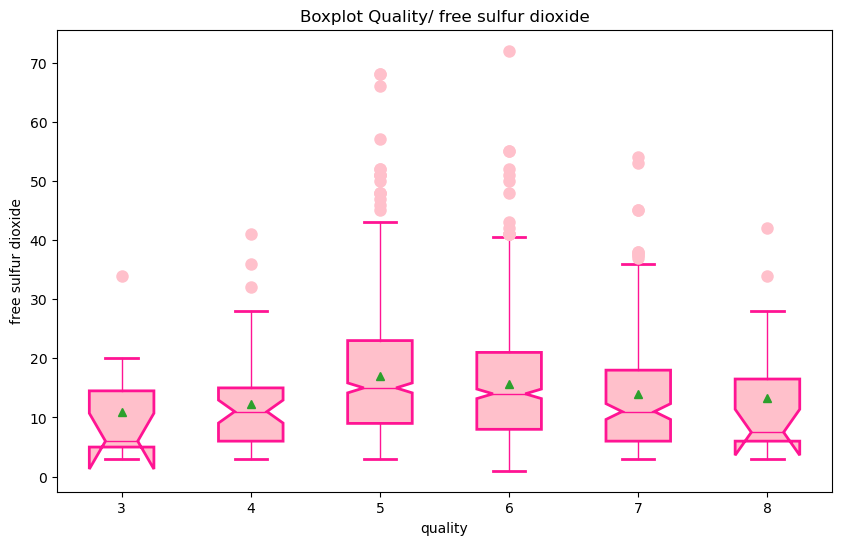

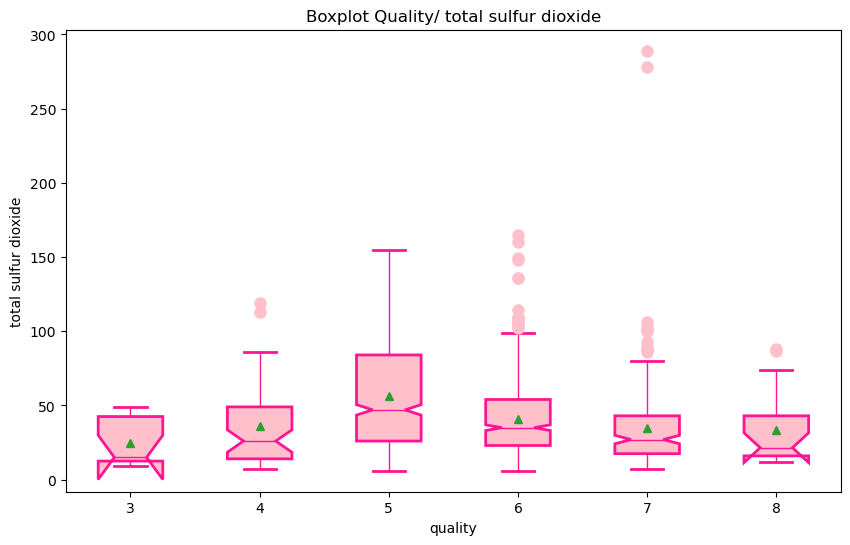

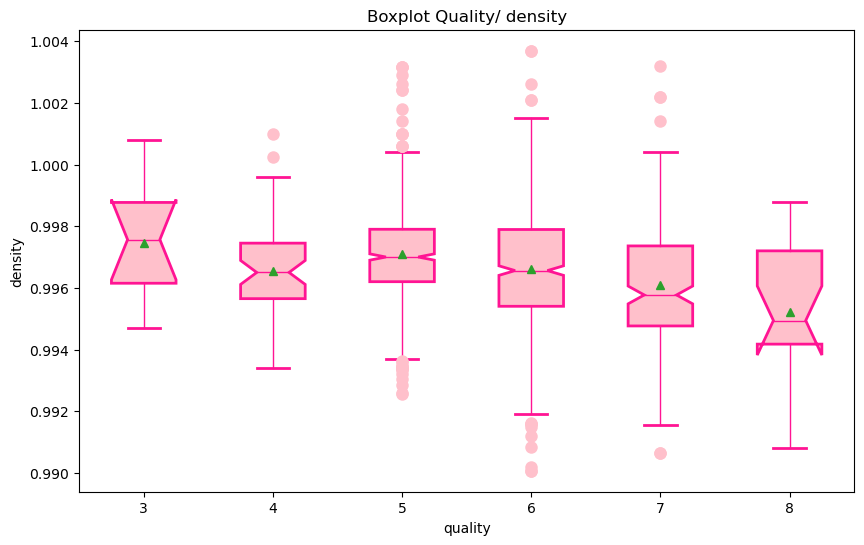

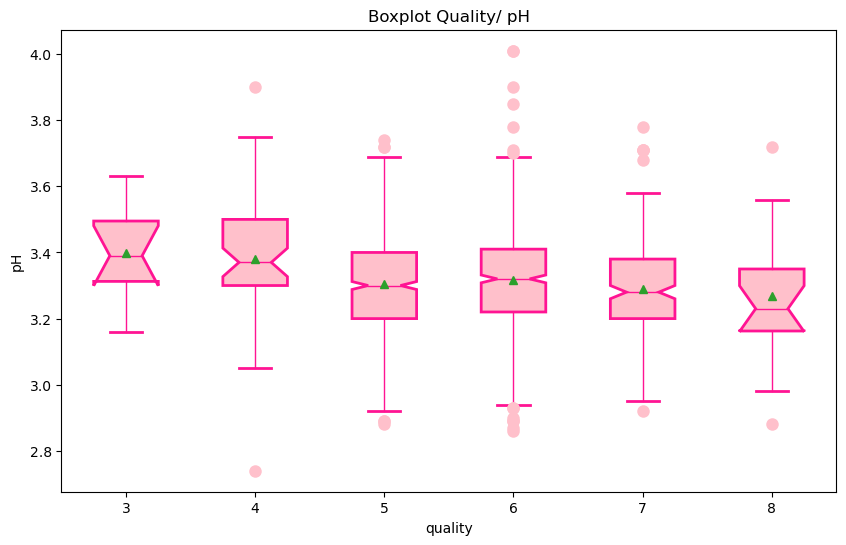

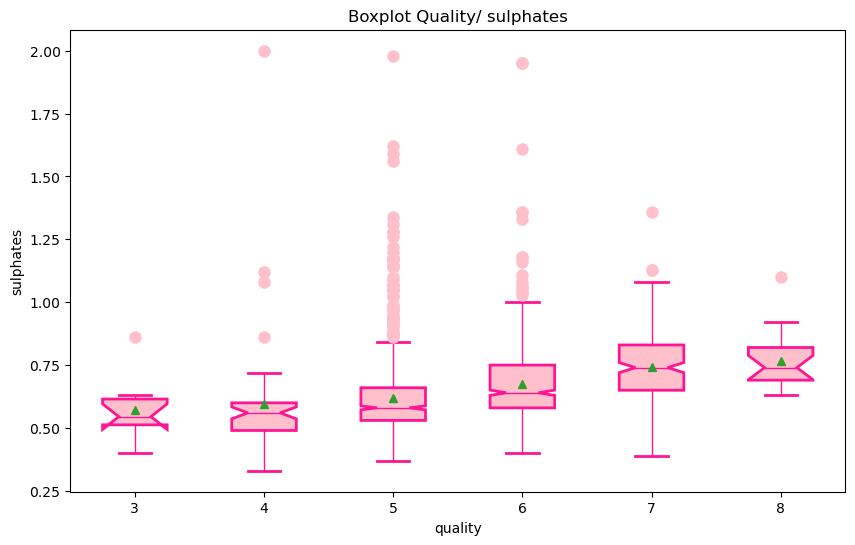

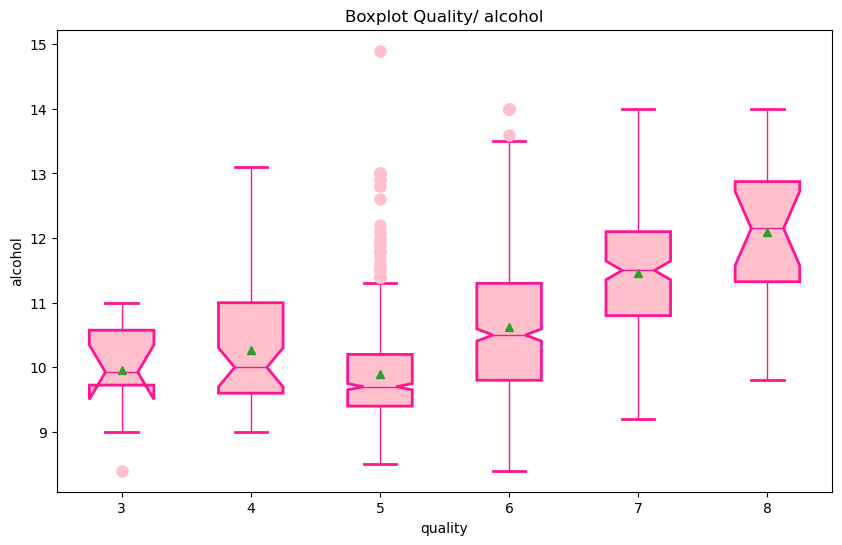

In [163]:

boxplot_general(wine_pd,'quality')

Estes mapas son muy útiles para determinar los outliers que presentan los distintos datos

# Matriz de correlacion y mapa de calor

Se calcula la matriz de correlación de las variables del DataFrame `wine_pd`.

In [164]:

# Matriz de correlación
corr_matrix= wine_pd.corr()
corr_matrix


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Se obtienen los valores únicos de la columna 'quality' del DataFrame `wine_pd`, ordenados de forma ascendente.


In [165]:
sorted(wine_pd.quality.unique())

[3, 4, 5, 6, 7, 8]

Se define la función `mapa_calor` que genera un mapa de calor a partir de una matriz de correlación dada.

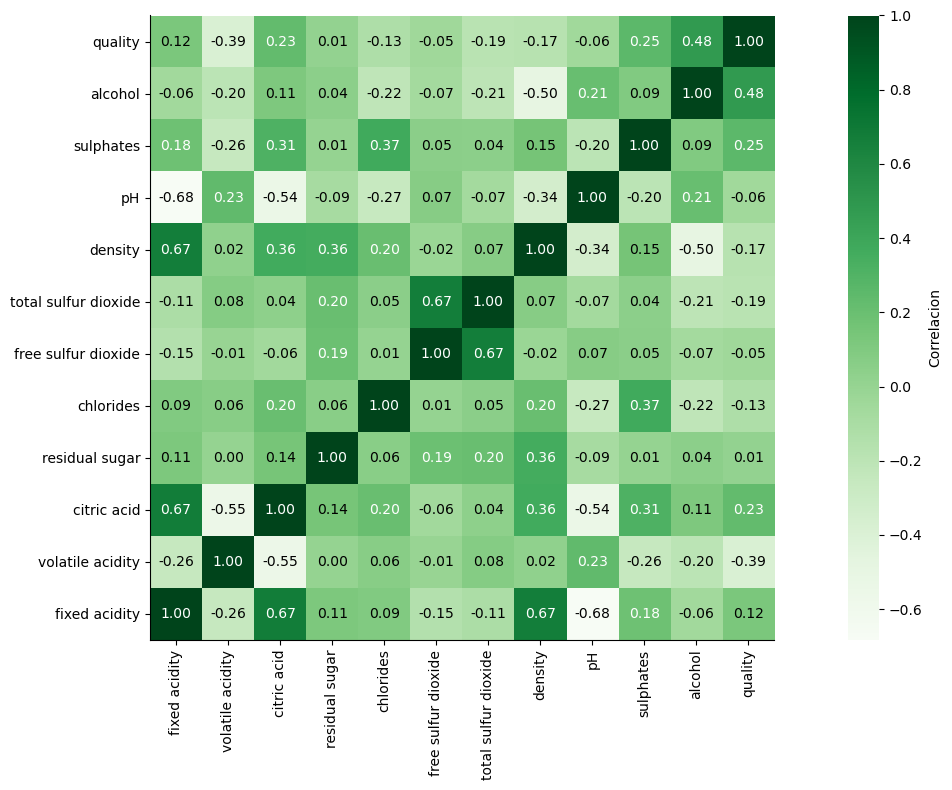

In [166]:
mapa_calor(corr_matrix)

# Scatter cruzado de las columnas más prometedoras

Al observar el mapa de calor cogeremos los datos que más se acercan a -1 o a 1

Se utiliza el método `plot()` del DataFrame `wine_pd` para generar un gráfico de dispersión que muestra la relación entre las variables 'alcohol' en el eje x y 'density' en el eje y. Los puntos en el gráfico se colorearán de acuerdo con la columna 'quality'.


<Axes: xlabel='alcohol', ylabel='density'>

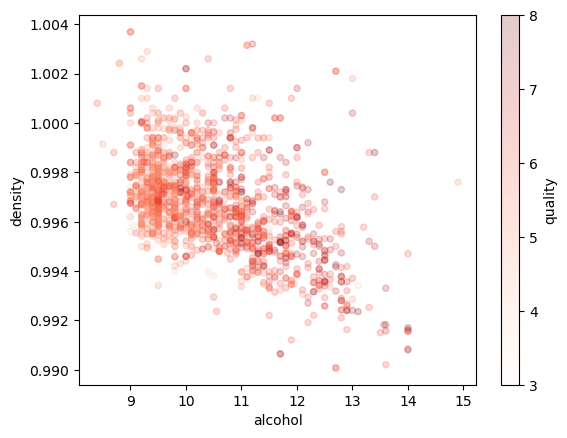

In [167]:
#alcohol está bastante relacionado con la qualidad y densidad del vino por tanto
wine_pd.plot(kind='scatter', x= 'alcohol', y= 'density', alpha=0.2, c='quality',cmap='Reds')

Se utiliza el método `plot()` del DataFrame `wine_pd` para generar un gráfico de dispersión que muestra la relación entre las variables 'fixed acidity' en el eje x y 'density' en el eje y.


<Axes: xlabel='fixed acidity', ylabel='density'>

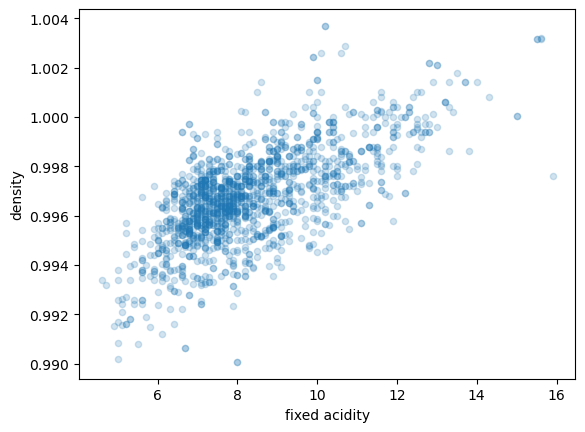

In [168]:
wine_pd.plot(kind='scatter', x= 'fixed acidity', y= 'density', alpha=0.2)

Se utiliza el método `plot()` del DataFrame `wine_pd` para generar un gráfico de dispersión que muestra la relación entre las variables 'fixed acidity' en el eje x y 'pH' en el eje y.


<Axes: xlabel='fixed acidity', ylabel='pH'>

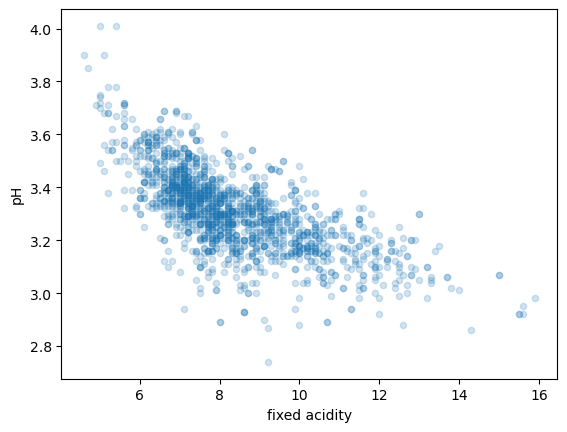

In [169]:
wine_pd.plot(kind='scatter', x= 'fixed acidity', y= 'pH', alpha=0.2)

Se utiliza la función `hist()` del DataFrame `wine_pd` para generar un histograma que muestra la distribución de los valores de la columna 'quality', que representa la calidad del vino.


<Axes: >

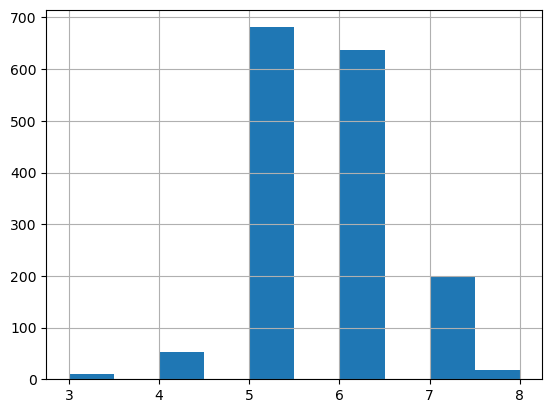

In [170]:
wine_pd['quality'].hist()

## Entrenamientos

Se realiza un análisis de regresión lineal utilizando la biblioteca `scikit-learn` para ajustar un modelo de regresión lineal, un arbol de regresion,random forest,XGboost y SGV a los datos del DataFrame `wine_pd`.

### Regresión lineal

In [171]:
wine_pd=wine_pd[["alcohol", "volatile acidity","sulphates",'citric acid','quality']].copy()
for datos in wine_pd.columns:
    if datos!='quality':
        q_low = wine_pd[datos].quantile(0.01)
        q_hi  = wine_pd[datos].quantile(0.99)
        df_filtrado = wine_pd[(wine_pd[datos] < q_hi) & (wine_pd[datos] > q_low)]
df_filtrado

,alcohol,volatile acidity,sulphates,citric acid,quality
2,9.8,0.760,0.65,0.04,5
3,9.8,0.280,0.58,0.56,6
6,9.4,0.600,0.46,0.06,5
8,9.5,0.580,0.57,0.02,7
9,10.5,0.500,0.80,0.36,5
...,...,...,...,...,...
1594,10.5,0.600,0.58,0.08,5
1595,11.2,0.550,0.76,0.10,6
1596,11.0,0.510,0.75,0.13,6
1597,10.2,0.645,0.71,0.12,5


Se realiza el entrenamiento de un modelo utilizando el DataFrame `df_filtrado`.


In [179]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

warnings.filterwarnings("ignore")


x_train, y_train, x_test, y_test = train(df_filtrado)

listaClasificadores = [
    [KNeighborsClassifier(), 'KNeighborsClassifier'],
    [GradientBoostingClassifier(), 'GradientBoostingClassifier'],
    # [XGBClassifier(), 'XGBClassifier'],
    [AdaBoostClassifier(), 'AdaBoostClassifier'],
    [MLPClassifier(), 'MLPClassifier'],
    [GaussianNB(), 'GaussianNB']
]

average = "weighted"
for clf, nombre in listaClasificadores:
    print('----------------------------')
    print(f'Modelo: {nombre}')
    ret = cross_val_score(clf, x_train, y_train, cv=3, scoring="accuracy")
    y_train_pred = cross_val_predict(clf, x_train, y_train, cv=3)
    mc = confusion_matrix(y_train, y_train_pred)
    print(mc)
    print(f'Precisión: {precision_score(y_train, y_train_pred, average=average)}')
    print(f'Recall: {recall_score(y_train, y_train_pred, average=average)}')

(2320,582)
----------------------------
Modelo: KNeighborsClassifier
[[  0   0   6   1   0   0]
 [  0   2  21  10   0   0]
 [  1   4 364 121   2   0]
 [  0   3 174 259  35   0]
 [  0   0  19  82  42   1]
 [  0   0   3   8   2   0]]
Precisión: 0.5523324777789326
Recall: 0.575
----------------------------
Modelo: GradientBoostingClassifier
[[  0   1   5   1   0   0]
 [  2   1  20  10   0   0]
 [  1   5 348 133   5   0]
 [  1   4 150 266  48   2]
 [  0   0   6  84  53   1]
 [  0   0   1   8   2   2]]
Precisión: 0.5616288176290716
Recall: 0.5775862068965517
----------------------------
Modelo: AdaBoostClassifier
[[  1   0   4   2   0   0]
 [  3   0  14  16   0   0]
 [  5   0 343 144   0   0]
 [  2   0 161 308   0   0]
 [  0   0  14 130   0   0]
 [  0   0   1  12   0   0]]
Precisión: 0.4758039332438462
Recall: 0.5620689655172414
----------------------------
Modelo: MLPClassifier
[[  0   0   6   1   0   0]
 [  0   0  24   9   0   0]
 [  0   0 354 137   1   0]
 [  0   0 156 312   3   0]
 [  0

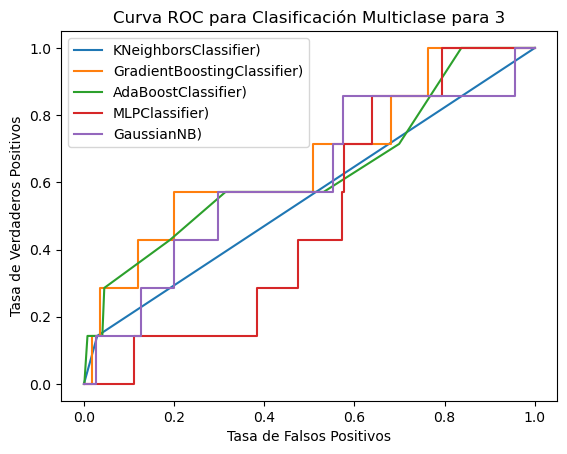

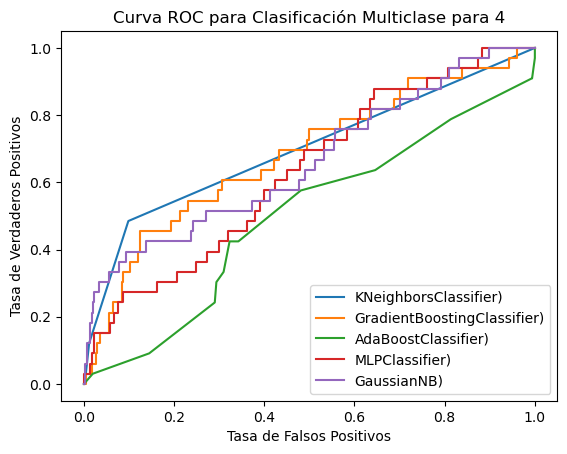

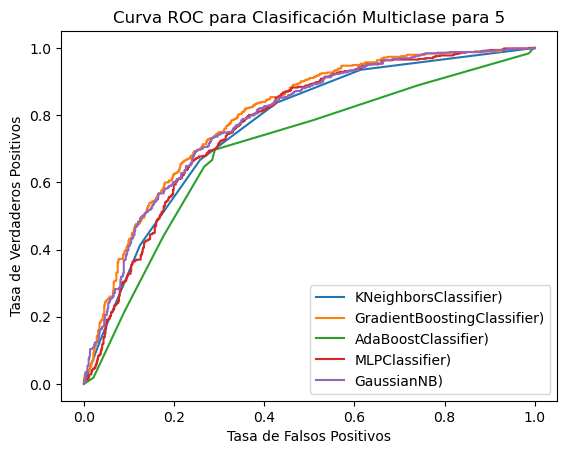

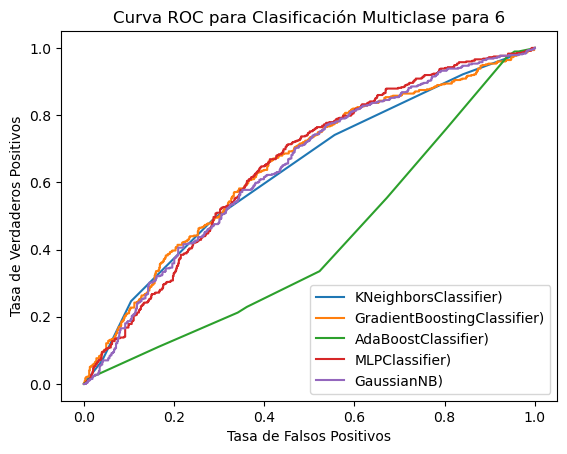

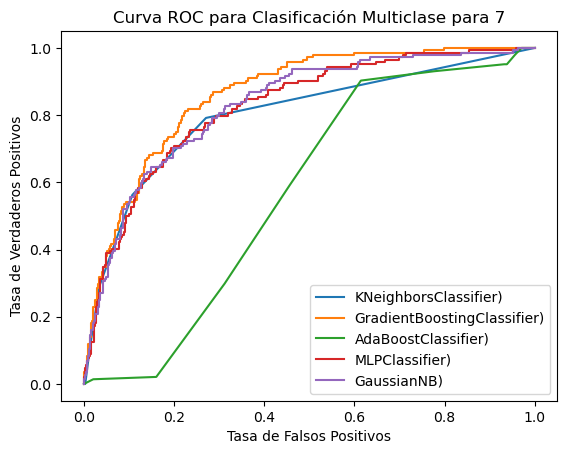

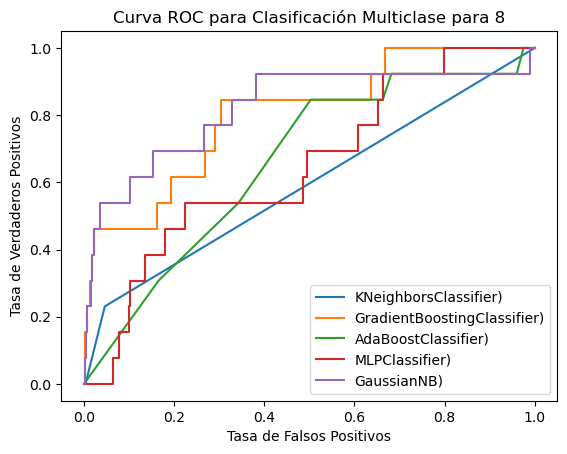

In [215]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

y_train_bin = label_binarize(y_train, classes=[3, 4, 5, 6, 7, 8])
n_classes = y_train_bin.shape[1]
for i in range(n_classes):
    for clf, nombre in listaClasificadores:

        y_probas = cross_val_predict(clf, x_train, y_train, cv=3, method="predict_proba")
        fpr, tpr, thresholds = roc_curve(y_train_bin[:, i], y_probas[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{nombre})')

    plt.legend()
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title(f'Curva ROC para Clasificación Multiclase para {i+3}')
    plt.show()


David Fernández Reboredo